In [15]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score


In [5]:
data = pd.read_csv('clean_train_data.csv');
data_test = pd.read_csv('clean_test_data.csv');

ss = StandardScaler().fit(data.drop('income', axis=1))
ss2 = StandardScaler().fit(data_test.drop('income', axis=1))

X = ss.transform(data.drop('income', axis=1))
X2 = ss2.transform(data_test.drop('income', axis=1))
y = data['income']
y2 = data_test['income']

In [6]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

X_train = X
X_test = X2
y_train = y
y_test = y2

# Logistic Regression

In [7]:
lr = LogisticRegression()

lr_model =lr.fit(X_train, y_train)
lr_prediction = lr_model.predict(X_test)

print(confusion_matrix(y_test, lr_prediction))

print(classification_report(y_test, lr_prediction))

0.8241454500783145
0.8234752165100424
[[11540   895]
 [ 1979  1867]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     12435
           1       0.68      0.49      0.57      3846

    accuracy                           0.82     16281
   macro avg       0.76      0.71      0.73     16281
weighted avg       0.81      0.82      0.81     16281



## Random Forest

In [8]:
rfc = RandomForestClassifier()

rfc_model =rfc.fit(X_train, y_train)
rfc_prediction = rfc_model.predict(X_test)

print(confusion_matrix(y_test, rfc_prediction))
'''
TP   FN
FP   TN
'''

print(classification_report(y_test, rfc_prediction))

0.9996314609502165
0.8256863829003133
[[11242  1193]
 [ 1645  2201]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     12435
           1       0.65      0.57      0.61      3846

    accuracy                           0.83     16281
   macro avg       0.76      0.74      0.75     16281
weighted avg       0.82      0.83      0.82     16281



## Decision Tree

In [9]:
dt = tree.DecisionTreeClassifier()

dt_model = dt.fit(X_train, y_train)
dt_prediction = dt_model.predict(X_test)

print(confusion_matrix(y_test, dt_prediction))
print(classification_report(y_test, dt_prediction))

0.9996621725376985
0.7865610220502426
[[10675  1760]
 [ 1715  2131]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     12435
           1       0.55      0.55      0.55      3846

    accuracy                           0.79     16281
   macro avg       0.70      0.71      0.71     16281
weighted avg       0.79      0.79      0.79     16281



## Naive Bayes

In [10]:
nb = GaussianNB()

nb_model = nb.fit(X_train, y_train)
nb_prediction = nb_model.predict(X_test)

print(confusion_matrix(y_test, nb_prediction))
print(classification_report(y_test, nb_prediction))

0.7979484659562053
0.7985995946194951
[[10637  1798]
 [ 1481  2365]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     12435
           1       0.57      0.61      0.59      3846

    accuracy                           0.80     16281
   macro avg       0.72      0.74      0.73     16281
weighted avg       0.80      0.80      0.80     16281



# Stochastic Gradient Descent

In [44]:
sgd = SGDClassifier(loss='modified_huber')

sgd_model = sgd.fit(X_train, y_train)
sgd_prediction = sgd_model.predict(X_test)

print(confusion_matrix(y_test, sgd_prediction))
print(classification_report(y_test, sgd_prediction))

Accuracy: 81.59%
[[11080  1355]
 [ 1642  2204]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     12435
           1       0.62      0.57      0.60      3846

    accuracy                           0.82     16281
   macro avg       0.75      0.73      0.74     16281
weighted avg       0.81      0.82      0.81     16281



## K-Nearest Neighbours

In [42]:
knn = KNeighborsClassifier()

knn_model = knn.fit(X_train, y_train)
knn_prediction = knn_model.predict(X_test)

print(confusion_matrix(y_test, knn_prediction))
print(classification_report(y_test, knn_prediction))

Accuracy: 82.30%
[[11159  1276]
 [ 1605  2241]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     12435
           1       0.64      0.58      0.61      3846

    accuracy                           0.82     16281
   macro avg       0.76      0.74      0.75     16281
weighted avg       0.82      0.82      0.82     16281



## Support Vector Machine

In [43]:
svm = SVC(probability=True)

svm_model = svm.fit(X_train, y_train)
svm_prediction = svm_model.predict(X_test
print(confusion_matrix(y_test, svm_prediction))
print(classification_report(y_test, svm_prediction))

Accuracy: 84.15%
[[11669   766]
 [ 1814  2032]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     12435
           1       0.73      0.53      0.61      3846

    accuracy                           0.84     16281
   macro avg       0.80      0.73      0.76     16281
weighted avg       0.83      0.84      0.83     16281



## Xgboost

In [41]:
params = {
    'booster':'gbtree',
    'objective':'multi:softmax', # set XGBoost to do multiclass classification
    'num_class':5,
    'gamma':0.5,  # Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
    'max_depth':5, # Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.
    'lambda':1,  # L2 regularization term on weights. Increasing this value will make model more conservative.
    'subsample':0.5, #  Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting.
    'colsample_bytree':0.7,  #subsample ratio of columns when constructing each tree
    'min_child_weight':3,  # Minimum sum of instance weight (hessian) needed in a child.
    'eta':0.1,  # Step size shrinkage used in update to prevents overfitting. 
    'seed':1000,  #Random number seed
    'nthread':5,  # Number of parallel threads used to run XGBoost
}
plst = list(params.items())
dtrain = xgb.DMatrix(X_train, y_train)
num_round = 500
xgb_model = xgb.train(plst, dtrain, num_round)
dtest = xgb.DMatrix(X_test)
ans = xgb_model.predict(dtest)

xgb_prediction = xgb_model.predict(dtest)
print(confusion_matrix(y_test, xgb_prediction))
print(classification_report(y_test, xgb_prediction))

Accuracy: 84.41%
[[11450   985]
 [ 1553  2293]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     12435
           1       0.70      0.60      0.64      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.76      0.77     16281
weighted avg       0.84      0.84      0.84     16281



## Models ROC

In [34]:
# Prediction probability

base_probs = [0 for _ in range(len(y_test))]

lr_probs = lr.predict_proba(X_test)
lr_probs = lr_probs[:,1]

rfc_probs = rfc.predict_proba(X_test)
rfc_probs = rfc_probs[:,1]

dt_probs = dt.predict_proba(X_test)
dt_probs = dt_probs[:,1]

nb_probs = nb.predict_proba(X_test)
nb_probs = nb_probs[:,1]

sgd_probs = sgd.predict_proba(X_test)
sgd_probs = sgd_probs[:,1]

knn_probs = knn.predict_proba(X_test)
knn_probs = knn_probs[:,1]

svm_probs = svm.predict_proba(X_test)
svm_probs = svm_probs[:,1]

xgb_probs = xgb_prediction

In [35]:
# AUROC: area under roc curve

base_auc = roc_auc_score(y_test, base_probs)

lr_auc = roc_auc_score(y_test, lr_probs)

rfc_auc = roc_auc_score(y_test, rfc_probs)

dt_auc = roc_auc_score(y_test, dt_probs)

nb_auc = roc_auc_score(y_test, nb_probs)

sgd_auc = roc_auc_score(y_test, sgd_probs)

knn_auc = roc_auc_score(y_test, knn_probs)

svm_auc = roc_auc_score(y_test, svm_probs)

xgb_auc = roc_auc_score(y_test, xgb_probs)

In [36]:
# False positive & True positive

base_fpr, base_tpr, _ = roc_curve(y_test, base_probs)

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_probs)

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

sgd_fpr, sgd_tpr, _ = roc_curve(y_test, sgd_probs)

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)

svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

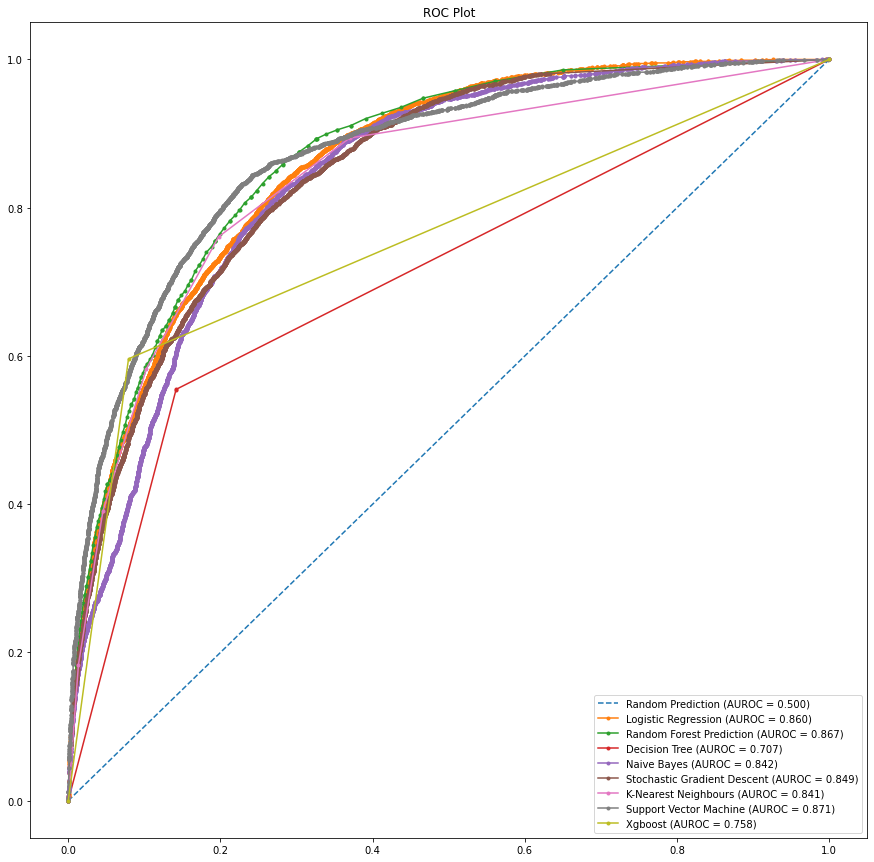

In [37]:
# Plot ROC Curve

plt.rcParams['figure.figsize'] = [15, 15]

plt.plot(base_fpr, base_tpr, linestyle='--', label='Random Prediction (AUROC = %0.3f)' %base_auc)

plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' %lr_auc)

plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Random Forest Prediction (AUROC = %0.3f)' %rfc_auc)

plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' %dt_auc)

plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' %nb_auc)

plt.plot(sgd_fpr, sgd_tpr, marker='.', label='Stochastic Gradient Descent (AUROC = %0.3f)' %sgd_auc)

plt.plot(knn_fpr, knn_tpr, marker='.', label='K-Nearest Neighbours (AUROC = %0.3f)' %knn_auc)

plt.plot(svm_fpr, svm_tpr, marker='.', label='Support Vector Machine (AUROC = %0.3f)' %svm_auc)

plt.plot(xgb_fpr, xgb_tpr, marker='.', label='Xgboost (AUROC = %0.3f)' %xgb_auc)

plt.title('ROC Plot')

plt.legend()


## Accuracy Evaluation

In [74]:
lr_accuracy = round(lr.score(X_test, y_test), 3)
rfc_accuracy = round(rfc.score(X_test, y_test), 3)
dt_accuracy = round(dt.score(X_test, y_test), 3)
nb_accuracy = round(nb.score(X_test, y_test), 3)
sgd_accuracy = round(sgd.score(X_test, y_test), 3)
knn_accuracy = round(knn.score(X_test, y_test), 3)
svm_accuracy = round(svm.score(X_test, y_test), 3)
xgb_accuracy = round(accuracy_score(y_test, xgb_predictions),3)

accuracy = [lr_accuracy, rfc_accuracy, dt_accuracy, nb_accuracy, sgd_accuracy, knn_accuracy, svm_accuracy, xgb_accuracy] 

In [52]:
models = ['Logistic Regression',
          'Random Forest Prediction',
          'Decision Tree',
          'Naive Bayes',
          'Stochastic Gradient Descent',
          'K-Nearest Neighbours',
          'Support Vector Machine',
          'Xgboost']

In [76]:
accuracy_result = pd.DataFrame({'Accuracy':accuracy}, index=models)
accuracy_result = accuracy_result.sort_values(by='Accuracy')
print(accuracy_result)

                             Accuracy
Decision Tree                   0.787
Naive Bayes                     0.799
Stochastic Gradient Descent     0.816
Logistic Regression             0.823
K-Nearest Neighbours            0.823
Random Forest Prediction        0.826
Support Vector Machine          0.842
Xgboost                         0.844


## Conclusion

In [ ]:
# Random Forest Prediction is chosen as it has the Best ROC curve and nearly the best accuracy among the models.